In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

font_path = "C:/Windows/Fonts/gulim.ttc"
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family=font)

In [59]:
df = pd.read_csv("total_data.csv")

In [50]:
df

,년도,순위,팀,영문국가명,경기,승,무,패,득점,실점,득실차,승점,비고,예선_승률,예선_골득실률
0,2002,1,브라질,Brazil,7,7,0,0,18,4,14,21,우승,0.48,2.352113
1,2002,2,독일,Germany,7,5,1,1,14,3,11,16,준우승,0.60,1.817073
2,2002,3,터키,Turkey,7,4,1,2,10,6,4,13,3위,0.53,1.457627
3,2002,4,대한민국,South Korea,7,3,2,2,8,6,2,11,4위,0.67,2.216667
4,2002,5,스페인,Spain,5,3,2,0,10,5,5,11,8강,0.64,3.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022,28,덴마크,Denmark,3,0,1,2,1,3,-2,1,조별 리그,0.90,2.446429
188,2022,29,세르비아,Serbia,3,0,1,2,5,8,-3,1,조별 리그,0.75,1.536232
189,2022,30,웨일스,Wales,3,0,1,2,1,6,-5,1,조별 리그,0.60,1.233333
190,2022,31,캐나다,Canada,3,0,0,3,2,7,-5,0,조별 리그,0.55,2.296875


In [51]:
from sklearn.model_selection import train_test_split

X = df[['예선_골득실률','예선_승률']]
y = df['순위']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

c:\Users\chris\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\chris\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


0.020833333333333332

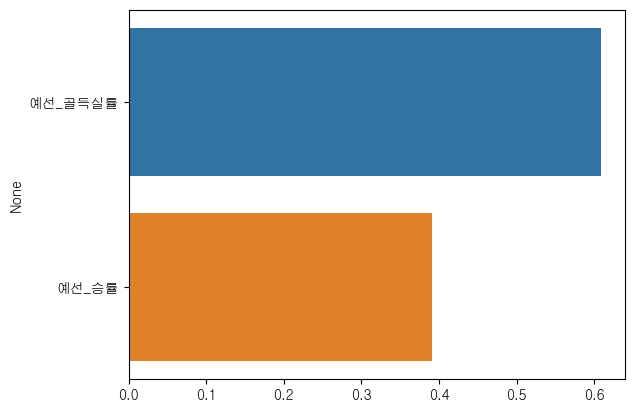

In [ ]:
sns.barplot(x=model.feature_importances_,y=X.columns,hue=X.columns)
plt.show()

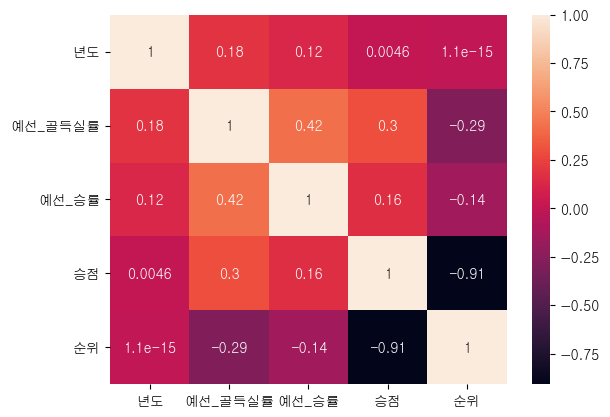

In [54]:
corr_matrix = df[['년도','예선_골득실률','예선_승률','승점','순위']].corr(numeric_only=True)  # correlation(상관관계) 특징들 간에 상관관계
corr_matrix

sns.heatmap(corr_matrix, annot=True)
plt.show()

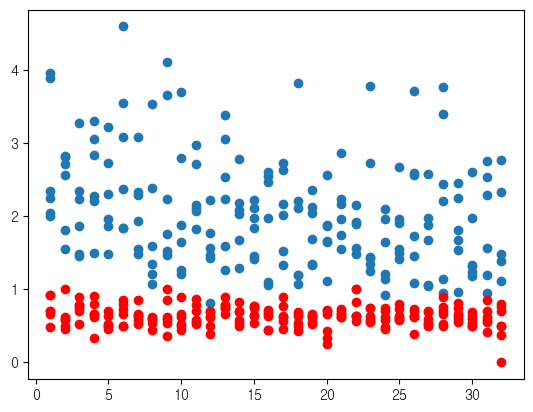

In [55]:
plt.scatter(df['순위'],df['예선_골득실률'])
plt.scatter(df['순위'],df['예선_승률'],c='red')
plt.show()

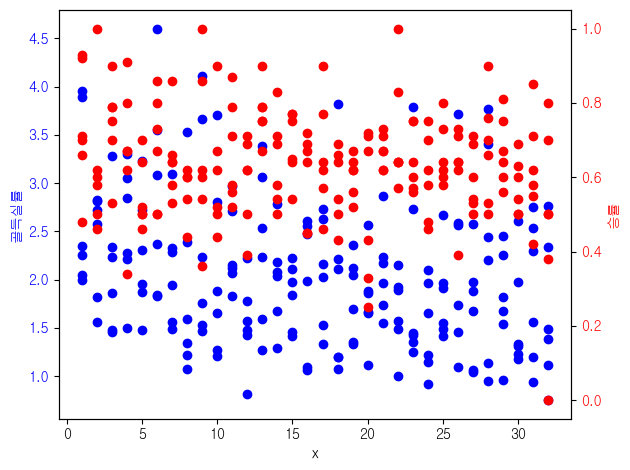

In [56]:
x = df['순위']
y1 = df['예선_골득실률']     # 왼쪽 y축 기준
y2 = df['예선_승률']  # 오른쪽 y축 기준 (scale 다름)

fig, ax1 = plt.subplots()

# 첫 번째 산점도 (왼쪽 y축)
ax1.scatter(x, y1, color='blue', label='골득실률')
ax1.set_ylabel('골득실률', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 산점도 (오른쪽 y축)
ax2 = ax1.twinx()  # y축 공유 x축
ax2.scatter(x, y2, color='red', label='승률')
ax2.set_ylabel('승률', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 라벨
ax1.set_xlabel('x')

fig.tight_layout()
plt.show()

<Axes: xlabel='순위', ylabel='예선_골득실률'>

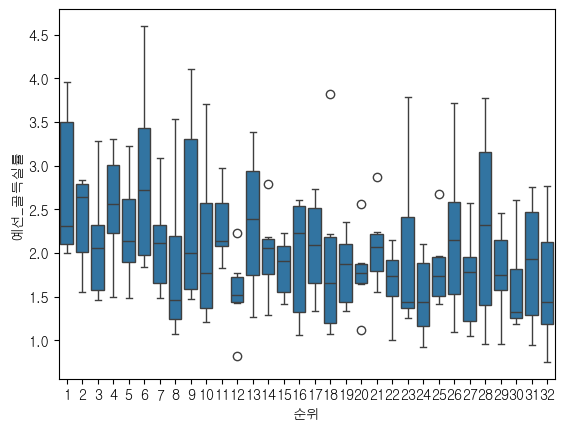

In [57]:
sns.boxplot(df[['예선_골득실률','순위']],y='예선_골득실률',x='순위')

<Axes: xlabel='순위', ylabel='예선_승률'>

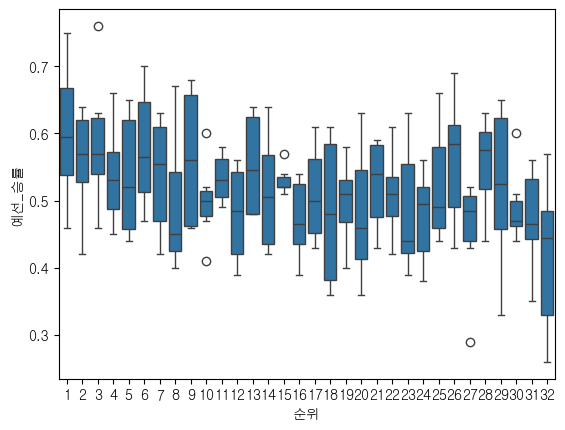

In [60]:
sns.boxplot(df[['예선_승률','순위']],y='예선_승률',x='순위')